## Name:-  Yogesh Khangode
## Class:- M.S.c Data Science
## Semester:- 3rd
## Roll No:- DS5B-2039

**Data Set:** https://www.kaggle.com/datafiniti/grammar-and-online-product-reviews 

**You need to perform the following exercise on the given dataset.**

Perform EDA and visualize the data to get some meaningful insights Apply Unsupervised Learning on review texts.

Supervised Machine learning model to predict ratings.

Evaluate your supervised machine learning model.

Also, **Find the following insights:**

Find Shoppers satisfaction.

Find Frequent words in reviews.

Find the most popular product that shoppers have purchased.

Find 3 reasons in top-rated comments why people liked it. (Hint: Frequent Words, Topic Modeling)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import numpy as np
import re
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingRegressor,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('GrammarandProductReviews.csv')

In [4]:
df

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,6855681.0,6.0,5,https://www.walmart.com/reviews/product/10294231,I'm dealing with dry eyes and very sensitive t...,Solves the problem,NaN,NaN,Seniorgal,"300650361040,631113253665,300650193108,3006503..."
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,71102868.0,1.0,5,https://www.walmart.com/reviews/product/10294231,Great stuff! Helps keep my contacts moist all ...,Great stuff!,NaN,NaN,Nammaw,"300650361040,631113253665,300650193108,3006503..."
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,58039428.0,0.0,5,https://www.walmart.com/reviews/product/10294231,Right price,My review,NaN,NaN,LDBoston,"300650361040,631113253665,300650193108,3006503..."
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",2017-06-28T15:23:21Z,2018-02-05T10:19:41Z,8.78982E+11,"878982005883,bebeaulait/50032623,08789820

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [6]:
df.shape

(71044, 25)

In [7]:
df.sample(5)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
34863,AVpgaPd61cnluZ0-1FvC,Disney,"Movies, Music & Books,Ways To Shop Entertainme...",2016-12-28T22:31:24Z,2018-02-05T08:36:37Z,NaN,"786936850628,disney/50978083,junglebookblurayd...",Buena Vista,50978083,The Jungle Book (blu-Ray/dvd + Digital),...,NaN,0.0,5,http://reviews.bestbuy.com/3545/5094600/review...,I loved this movie because they did an excelle...,Great remake,NaN,NaN,CindyinMD,7.86937E+11
45422,AVpgoyEtLJeJML43Qvjb,Quilted Northern,"Household Essentials,Ways To Shop,Household Es...",2017-01-06T18:09:52Z,2018-02-05T08:34:59Z,42000871228,"quiltednorthern/52033949,042000871228,quiltedn...",161840:Quilted Northern,52033949,Quilted Northern Ultra Plush Toilet Paper - 18...,...,98400137.0,NaN,5,https://www.walmart.com/reviews/product/516289...,"So soft, we're using it for more things such a...",SUPER SOFT,NaN,NaN,BRENDA G,42000871228
44138,AVpgOPJHLJeJML43KwSj,Universal Home Video,"Featured Brands,Character Shop,The Secret Life...",2017-01-15T18:04:14Z,2018-02-05T10:22:44Z,NaN,"025192392665,universalhomevideo/51605670,unive...",Universal,51605670,The Secret Life Of Pets (4k/uhd + Blu-Ray + Di...,...,NaN,0.0,5,http://reviews.bestbuy.com/3545/5615602/review...,Secret Life of Pets is a great family movie. T...,Great movie great price,NaN,NaN,JoshuaFit,25192392665
50881,AVph3agoilAPnD_x-Mv3,Tide,"Household Essentials,Ways To Shop,Household Es...",2015-10-29T11:28:10Z,2018-02-05T08:35:12Z,NaN,"037000138822,tide/13918059,tideoriginalscentli...",Procter & Gamble,13918059,Tide Original Liquid Laundry Detergent - 100 Oz,...,21527652.0,NaN,5,https://www.walmart.com/reviews/product/194062...,"I mean, really...it smells delicious...clean.....",Who Doesn't LOVE Tide,NaN,NaN,Brynne,37000138822
29806,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",2017-01-27T22:18:07Z,2018-02-05T08:36:34Z,NaN,"071249334966,lorealparis/51028742,lor233alpari...",L'oreal Paris,51028742,L'or233al Paris Elvive Extraordinary Clay Reba...,...,NaN,NaN,4,https://redsky.target.com/groot-domain-api/v1/...,"This conditioner is fair , better than the sha...",Good !,Chino,NaN,Jmedin14,71249334966


In [8]:
df.iloc[[5]]

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,149773828.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,Samantha,67981934427


In [9]:
df.iloc[[7,5,4]]

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,131769441.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,Kimmie,67981934427
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,149773828.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,Samantha,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


### Checking Missing Values from Datasets

In [10]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

### Calculate Missing Value Percentage

In [11]:
df.isnull().sum()/df.shape[0]*100

id                       0.000000
brand                    0.000000
categories               0.000000
dateAdded                0.000000
dateUpdated              0.000000
ean                     45.012950
keys                     0.000000
manufacturer             0.198469
manufacturerNumber       0.285738
name                     0.000000
reviews.date             0.094308
reviews.dateAdded        0.000000
reviews.dateSeen         0.000000
reviews.didPurchase     54.735094
reviews.doRecommend     14.941445
reviews.id              54.735094
reviews.numHelpful      54.242441
reviews.rating           0.000000
reviews.sourceURLs       0.000000
reviews.text             0.050673
reviews.title            0.670007
reviews.userCity        92.385001
reviews.userProvince    99.367997
reviews.username         0.135128
upc                      0.002815
dtype: float64

In [12]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [13]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')

In [14]:
df['reviews.title'].unique()

array(['Just Awesome', 'Good', 'Disappointed', ..., 'Worth every penny.',
       'Solves the problem', 'Makes The Holidays Better'], dtype=object)

In [15]:
df['reviews.title'].nunique()

42682

In [16]:
df['brand'].nunique()

392

In [17]:
df['reviews.rating'].unique()

array([5, 1, 3, 4, 2], dtype=int64)

In [18]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


## 1. Data Pre-processing

In [19]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [20]:
c =[]

In [21]:
df1 = df.dropna(axis=1)

In [22]:
df

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,6855681.0,6.0,5,https://www.walmart.com/reviews/product/10294231,I'm dealing with dry eyes and very sensitive t...,Solves the problem,NaN,NaN,Seniorgal,"300650361040,631113253665,300650193108,3006503..."
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,71102868.0,1.0,5,https://www.walmart.com/reviews/product/10294231,Great stuff! Helps keep my contacts moist all ...,Great stuff!,NaN,NaN,Nammaw,"300650361040,631113253665,300650193108,3006503..."
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,58039428.0,0.0,5,https://www.walmart.com/reviews/product/10294231,Right price,My review,NaN,NaN,LDBoston,"300650361040,631113253665,300650193108,3006503..."
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",2017-06-28T15:23:21Z,2018-02-05T10:19:41Z,8.78982E+11,"878982005883,bebeaulait/50032623,08789820

In [23]:
df['brand'].value_counts().iloc[:20]

Clorox                  10700
Universal Home Video     6178
Tide                     5384
FOX                      4498
Disney                   3692
Olay                     3420
Warner Home Video        3330
L'Oreal Paris            2683
L'oreal Paris            2288
Sony Pictures            2161
Rubbermaid               1939
Warner Bros.             1920
Quilted Northern         1439
Lionsgate                1351
Burt's Bees               965
Summit Entertainment      821
Nexxus                    773
Maybelline                742
Pantene                   655
Foodsaver                 587
Name: brand, dtype: int64

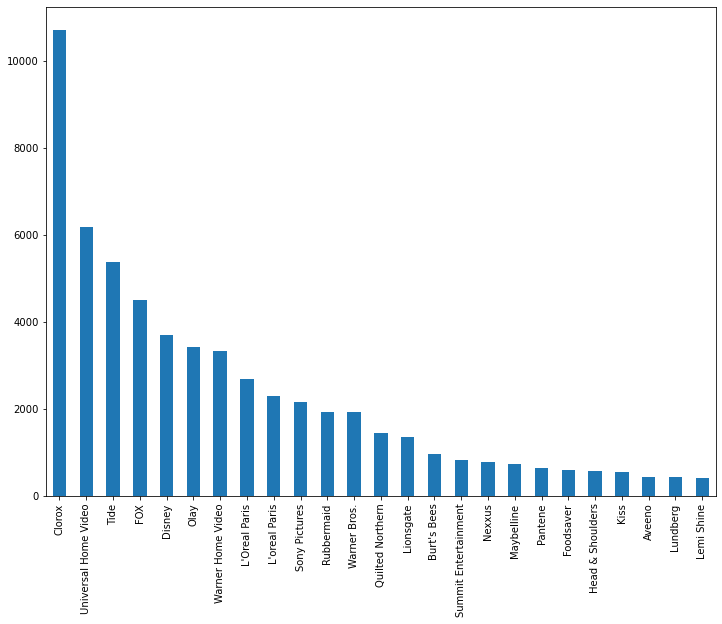

In [24]:
plt.figure(figsize=(12,9))
df['brand'].value_counts().iloc[:25].plot(kind = 'bar')
plt.show()

In [25]:
len(df['brand'].unique())

392

In [26]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [27]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')

In [28]:
columns = ['id','keys','manufacturerNumber','name','reviews.date','reviews.dateSeen','reviews.dateAdded','reviews.sourceURLs','reviews.userCity','reviews.userProvince', 'reviews.username','dateAdded', 'dateUpdated','reviews.id']

In [29]:
df1 = df.drop(columns,axis=1)

In [30]:
df1

,brand,categories,ean,manufacturer,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,upc
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",6.02537E+11,Universal Music Group / Cash Money,NaN,NaN,0.0,5,i love this album. it's very good. more to the...,Just Awesome,6.02537E+11
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",73416000391,Lundberg,True,NaN,NaN,5,Good flavor. This review was collected as part...,Good,73416000391
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",73416000391,Lundberg,True,NaN,NaN,5,Good flavor.,Good,73416000391
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",67981934427,K-Y,False,False,NaN,1,I read through the reviews on here before look...,Disappointed,67981934427
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",67981934427,K-Y,False,False,NaN,1,My husband bought this gel for us. The gel cau...,Irritation,67981934427
...,...,...,...,...,...,...,...,...,...,...,...
71039,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...","3,006,503,610,570,300,000,000,000,000,000,000,...",Opti-Free,False,True,6.0,5,I'm dealing with dry eyes and very sensitive t...,Solves the problem,"300650361040,631113253665,300650193108,3006503..."
71040,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...","3,006,503,610,570,300,000,000,000,000,000,000,...",Opti-Free,False,True,1.0,5,Great stuff! Helps keep my contacts moist all ...,Great stuff!,"300650361040,631113253665,300650193108,3006503..."
71041,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...","3,006,503,610,570,300,000,000,000,000,000,000,...",Opti-Free,False,True,0.0,5,Right price,My review,"300650361040,631113253665,300650193108,3006503..."
71042,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",8.78982E+11,Bebe au Lait,NaN,True,1.0,5,I was so pleased when this scarf arrived for m...,Wonderful Product,8.78982E+11


In [31]:
df['categories'].unique()

array(['Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap',
       'Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes',
       'Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants',
       'Personal Care,Skin Care,Hand Cream,Beauty,Body Lotions & Creams,Natural Beauty,Natural Personal Care,Natural Skin Care,Ways To Shop,Bath & Body,Hand Creams & Lotions',
       'Personal Care,Bath, Shower & Soap,Featured Brands,Health & Beauty,Johnson & Johnson,Bath & Body,Body Wash & Cleansers,Beauty,Skin Care,Facial Cleansers,Soaps',
       'Personal Care,Baby Care,Baby Bubble Bath,Baby,Bath & Potty,Toiletries,Bubble Bath,Baby Bath,Bath & Body,Body Wash & Cleansers',
       'Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers',
       'Household Essentials,Cleaning Suppl

In [32]:
len(df['categories'].unique())

581

In [33]:
df['reviews.didPurchase'].value_counts()

False    28476
True      3682
Name: reviews.didPurchase, dtype: int64

In [34]:
df['reviews.doRecommend'].value_counts()

True     55587
False     4842
Name: reviews.doRecommend, dtype: int64

## 2. Data Visualization

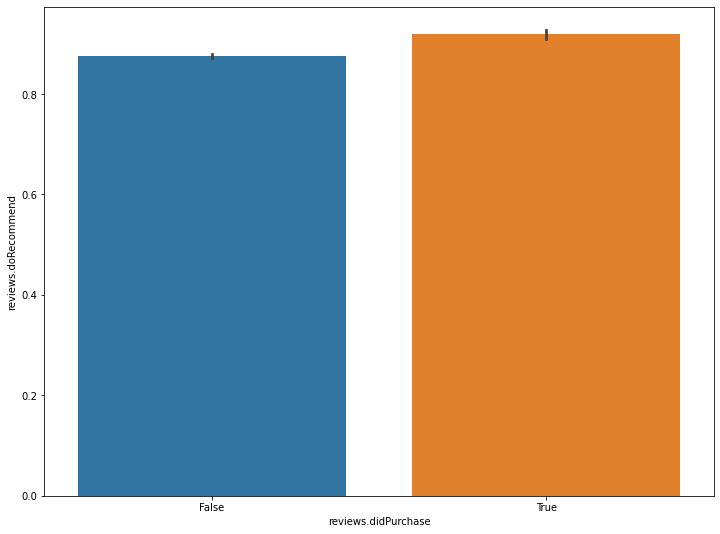

In [35]:
plt.figure(figsize=(12,9))
sns.barplot(df['reviews.didPurchase'],df['reviews.doRecommend'],data = df)
plt.show()

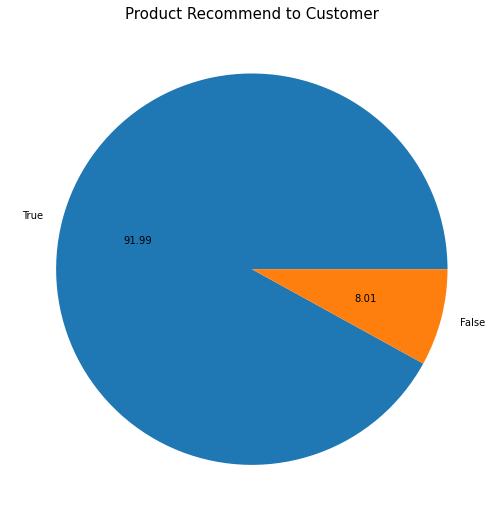

In [36]:
plt.figure(figsize=(12,9))
plt.pie(df['reviews.doRecommend'].value_counts(),labels=['True','False'],autopct='%0.2f')
plt.title('Product Recommend to Customer',size=15)
plt.show()

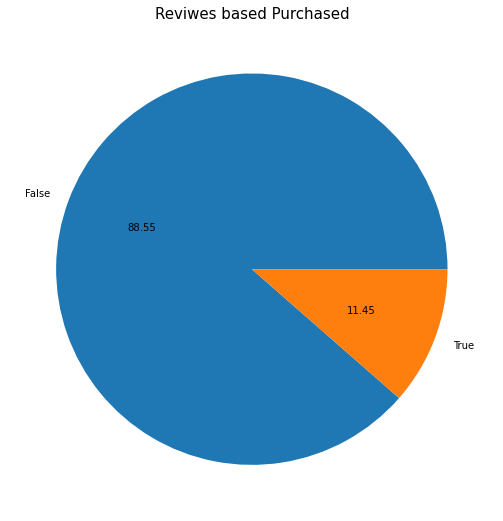

In [37]:
plt.figure(figsize=(12,9))
plt.pie(df['reviews.didPurchase'].value_counts(),labels=['False','True'],autopct='%0.2f')
plt.title('Reviwes based Purchased',size=15)
plt.show()

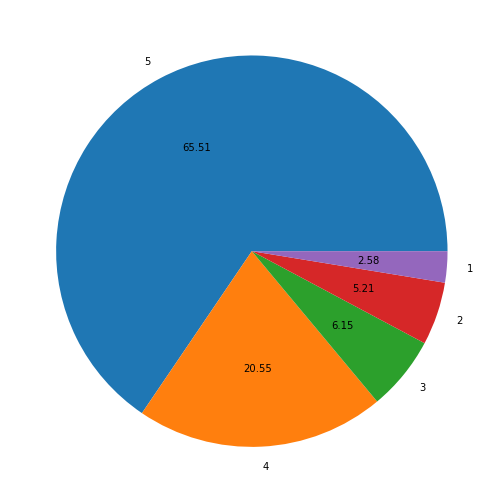

In [38]:
plt.figure(figsize=(16,9))
plt.pie(df['reviews.rating'].value_counts(),labels=['5','4','3','2','1'],autopct='%0.2f')
plt.show()

In [39]:
df['reviews.title'].value_counts()

Great movie                                     1367
Good movie                                       700
Great Product                                    585
Great Movie                                      559
Great                                            466
                                                ... 
Defective Design                                   1
10 years younger                                   1
Don't like change                                  1
It was a great movie                               1
Satisfying Godzilla Movie, Very Good Blu-Ray       1
Name: reviews.title, Length: 42682, dtype: int64

In [40]:
len(df['reviews.title'].value_counts())

42682

In [41]:
df['reviews.title'].value_counts().iloc[:55]

Great movie           1367
Good movie             700
Great Product          585
Great Movie            559
Great                  466
Great product          386
great movie            349
Awesome                333
Clorox Wipes           278
Good                   231
Funny                  216
Love it                209
Good Movie             202
Great family movie     200
Great movie!           200
Love it!               198
great product          194
Cute movie             189
Excellent              186
good movie             180
Funny movie            176
Five Stars             165
Great Product!         161
Great!                 155
great                  145
Amazing                141
Awesome movie          140
Hilarious              137
Awesome!               126
Great product!         117
clorox wipes           113
Clorox                 111
Clorox wipes           108
Love It                107
Love                   103
Great kids movie       103
Fun movie              100
F

In [42]:
df['reviews.title'].value_counts().sort_values(ascending=True).iloc[:55]

can i have some more                                                             1
Color is not what is depicted                                                    1
Great product, but not for everyone                                              1
Easy to use,easy to take with you,cleans everything                              1
An Amazing Product.                                                              1
It Brought My Hair Back To Life!!!!!                                             1
Generations of use......                                                         1
Just What The Laundry Ordered                                                    1
Saves our dishes!                                                                1
Great for parched skin                                                           1
Get The Shampoo Too                                                              1
Another Great JLaw Movie                                                         1
Yout

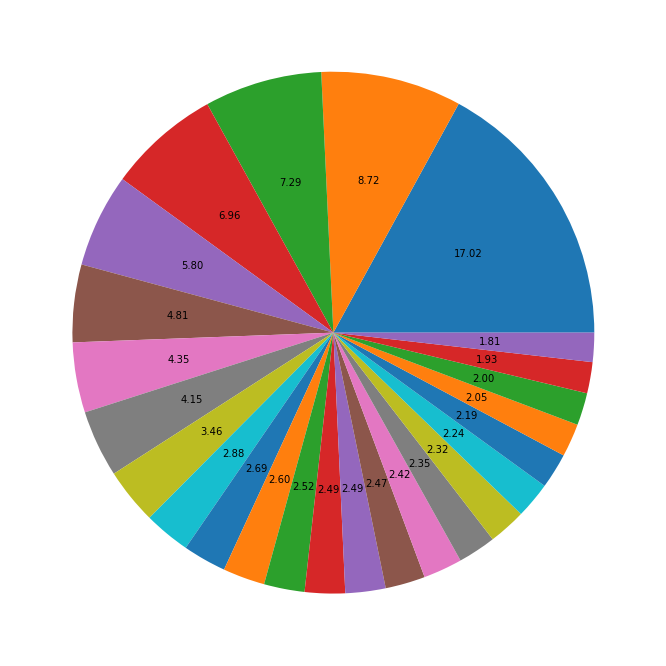

In [43]:
plt.figure(figsize=(20,12))
plt.pie(df['reviews.title'].value_counts().iloc[:25],autopct='%0.2f')
plt.show()

In [44]:
wc = WordCloud(width=1000,height=900,min_font_size=10,background_color='black')

In [45]:
df1.sample(5)

,brand,categories,ean,manufacturer,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,upc
30142,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",NaN,L'oreal Paris,False,True,NaN,5,I fell in love with this produce the very firs...,Love!,71249334966
55704,Early California,"Food,Packaged Foods,Condiments, Dips, & Salad ...",7.05815E+11,Musco Family Olive Co.,NaN,NaN,NaN,2,Quality suffering lately. Twice I threw it awa...,Spoiled/bad,7.05815E+11
68031,Honeywell,"Home,Home Appliances,Fans,Home Improvement,Hea...",NaN,Honeywell,NaN,True,0.0,5,Great fan Covers large area and is very quiet ...,Great fan,92926202903
51924,L'Oreal Paris,"Personal Care,Hair Care,Hair Treatments,Condit...",71249243954,L'oreal Paris,NaN,NaN,NaN,3,I used a light coat of this on wet hair &#40;f...,NaN,71249243954
31585,Lady Mitchum,"Personal Care,Deodorants & Antiperspirants,Deo...","3,099,786,362,050,790,000,000,000",Lady Mitchum Deodorants,False,True,3.0,5,This is the best deodorant that I have found ....,Best deodorant,"309,973,234,000,309,000,000,000,000,000,000,000"


In [46]:
df1

,brand,categories,ean,manufacturer,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,upc
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",6.02537E+11,Universal Music Group / Cash Money,NaN,NaN,0.0,5,i love this album. it's very good. more to the...,Just Awesome,6.02537E+11
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",73416000391,Lundberg,True,NaN,NaN,5,Good flavor. This review was collected as part...,Good,73416000391
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",73416000391,Lundberg,True,NaN,NaN,5,Good flavor.,Good,73416000391
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",67981934427,K-Y,False,False,NaN,1,I read through the reviews on here before look...,Disappointed,67981934427
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",67981934427,K-Y,False,False,NaN,1,My husband bought this gel for us. The gel cau...,Irritation,67981934427
...,...,...,...,...,...,...,...,...,...,...,...
71039,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...","3,006,503,610,570,300,000,000,000,000,000,000,...",Opti-Free,False,True,6.0,5,I'm dealing with dry eyes and very sensitive t...,Solves the problem,"300650361040,631113253665,300650193108,3006503..."
71040,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...","3,006,503,610,570,300,000,000,000,000,000,000,...",Opti-Free,False,True,1.0,5,Great stuff! Helps keep my contacts moist all ...,Great stuff!,"300650361040,631113253665,300650193108,3006503..."
71041,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...","3,006,503,610,570,300,000,000,000,000,000,000,...",Opti-Free,False,True,0.0,5,Right price,My review,"300650361040,631113253665,300650193108,3006503..."
71042,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",8.78982E+11,Bebe au Lait,NaN,True,1.0,5,I was so pleased when this scarf arrived for m...,Wonderful Product,8.78982E+11


In [47]:
df1 = df[['reviews.text','reviews.rating']]

In [48]:
df1

,reviews.text,reviews.rating
0,i love this album. it's very good. more to the...,5
1,Good flavor. This review was collected as part...,5
2,Good flavor.,5
3,I read through the reviews on here before look...,1
4,My husband bought this gel for us. The gel cau...,1
...,...,...
71039,I'm dealing with dry eyes and very sensitive t...,5
71040,Great stuff! Helps keep my contacts moist all ...,5
71041,Right price,5
71042,I was so pleased when this scarf arrived for m...,5


## 4. Missing Value

In [49]:
df1.isnull().sum()

reviews.text      36
reviews.rating     0
dtype: int64

In [50]:
df1.dropna(inplace=True)

In [51]:
df1.isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [52]:
df1.describe()

,reviews.rating
count,71008.000000
mean,4.385619
std,1.067794
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [53]:
df1

,reviews.text,reviews.rating
0,i love this album. it's very good. more to the...,5
1,Good flavor. This review was collected as part...,5
2,Good flavor.,5
3,I read through the reviews on here before look...,1
4,My husband bought this gel for us. The gel cau...,1
...,...,...
71039,I'm dealing with dry eyes and very sensitive t...,5
71040,Great stuff! Helps keep my contacts moist all ...,5
71041,Right price,5
71042,I was so pleased when this scarf arrived for m...,5


## 5. Columns Rename

In [56]:
df1.rename(columns={'reviews.text':'Reviews','reviews.rating':'Rating'},inplace=True)

In [57]:
df1

,Reviews,Rating
0,i love this album. it's very good. more to the...,5
1,Good flavor. This review was collected as part...,5
2,Good flavor.,5
3,I read through the reviews on here before look...,1
4,My husband bought this gel for us. The gel cau...,1
...,...,...
71039,I'm dealing with dry eyes and very sensitive t...,5
71040,Great stuff! Helps keep my contacts moist all ...,5
71041,Right price,5
71042,I was so pleased when this scarf arrived for m...,5


In [58]:
df1.duplicated().sum()

6059

In [59]:
df1 = df1.drop_duplicates(keep='first')

In [60]:
df1.duplicated().sum()

0

## 7. Dependent Value Analysis 

In [61]:
df1.rename(columns={'reviews.text':'Reviews','reviews.rating':'Rating'},inplace=True)

# 11.2 Technique:- 2 : TF-ID Vectorizer

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [63]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [64]:
tf=TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='char',stop_words='english',ngram_range=(2, 6),max_features=50000)

In [65]:
X = tf.fit_transform(df1['Reviews'])

In [80]:
y = df1['Rating'].map({1:'Unhappy',2:'Unhappy',3:'Ok',4:'Happy',5:'Happy'})

In [95]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 101,shuffle=True)

In [96]:
modl = SVC()

In [ ]:
modl.fit(x_train,y_train)

In [ ]:
modl.score(x_train,y_train)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model2 = SGDClassifier()
model2.fit(x_train,y_train) 

In [ ]:
model2.score(x_train,y_train)

In [ ]:
model3 = LogisticRegression()
model3.fit(x_train,y_train) 
print(model3.score(x_train,y_train))